In [1]:
import sys

sys.path.append('./..')
sys.path.append('./../code')
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# RQ1 - Which countries did best in the pandemic?
The approach for this question will be to create a ranking of all the countries for all the parameters that show a good handling of the pandemic.

In [2]:
# Create Study
from study import CovidCountryStudy
import pandas as pd
timeseries_data_path = './../data/timeseries_by_country.csv'
country_data_path ='./../data/country_data.csv'
st = CovidCountryStudy(data=pd.read_csv(timeseries_data_path),
                                downsampling=7,
                                country_data = pd.read_csv(country_data_path,index_col=0))

In [3]:
# Create ByCountry Study
from study import CovidByCountryStudy
st_gb = CovidByCountryStudy(data=st.data,standard_parameter_groupbys=[(max, ('covid', 'status', 'deaths')),(max, ('covid', 'status', 'recovered'))]
    )


----> Function calc_groupby_data                    
	- Standard_parameter_groupbys: [(<built-in function max>, ('covid', 'status', 'deaths')), (<built-in function max>, ('covid', 'status', 'recovered'))]                    
	- Located_parameter_groupbys: None


In [14]:
df = st_gb.groupby_data.data
df

,max_covid_status_deaths,max_covid_status_recovered
country,,
Afghanistan,19.669647,149.673757
Albania,121.473245,4517.824878
Algeria,15.675811,222.802217
American Samoa,0.000000,NaN
Andorra,198.701299,17776.623377
...,...,...
Uzbekistan,4.891093,365.615943
Vanuatu,2.280130,NaN
Yemen,7.181654,13.967679


# Best Countries by Deaths

<AxesSubplot:ylabel='Frequency'>

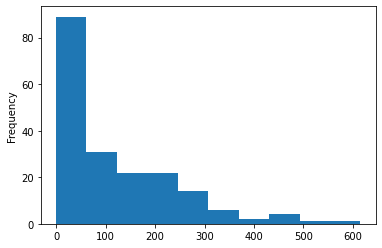

In [19]:
ranking_deaths = df.max_covid_status_deaths.sort_values()
ranking_deaths.plot(kind='hist')

In [32]:
ranking_deaths.head(25)

country
American Samoa              0.000000
Burundi                     0.319569
China                       1.007001
Chad                        1.156703
South Sudan                 1.232803
Niger                       1.276490
Bhutan                      1.295337
Tajikistan                  1.310547
Benin                       1.344552
Nigeria                     1.524207
Sierra Leone                1.567005
Burkina Faso                1.832273
Vanuatu                     2.280130
Central African Republic    2.339545
Eritrea                     2.904681
Togo                        3.297500
Guinea                      3.350339
Nicaragua                   3.441509
Mali                        3.609698
Ghana                       4.650340
Uzbekistan                  4.891093
Madagascar                  4.983569
Angola                      5.781050
Liberia                     5.812574
Ethiopia                    6.532480
Name: max_covid_status_deaths, dtype: float64

The top 25 countries don't really seem so reliable in their reporting, especially China.
Although the young population of some of the developing countries in this list could be an important factor in the mortality.
Let's take a look into the next 25, in case we find any countries with realiable sources.

In [31]:
ranking_deaths.iloc[25:50]

country
Congo                 6.977166
Mozambique            7.038874
Yemen                 7.181654
Papua New Guinea      7.253828
Cameroon              7.259097
Haiti                 7.322634
Uganda                7.859470
Tonga                 8.490566
Somalia               8.563519
Guinea-Bissau         8.638211
Samoa                 9.595960
Timor-Leste           9.863429
Kenya                10.503803
Kiribati             10.924370
Sudan                11.190677
Rwanda               11.264670
Senegal              11.735547
Singapore            12.752137
Equatorial Guinea    13.043478
New Zealand          13.459146
Gabon                13.611860
Malawi               13.716675
Pakistan             13.724807
Gambia               15.101365
Algeria              15.675811
Name: max_covid_status_deaths, dtype: float64

Singapore and New Zealand are much more reliable and have deaths of around 13 in 100.000 inhabitants!

In [33]:
ranking_deaths.iloc[50:75]

country
Bangladesh               17.683634
Cambodia                 18.272624
Comoros                  18.390805
Djibouti                 19.129555
Afghanistan              19.669647
Solomon Islands          20.232897
Mauritania               21.096774
Zambia                   21.578547
Australia                22.482353
Japan                    22.615358
United Arab Emirates     23.276036
Qatar                    23.498785
Egypt                    23.805382
Saudi Arabia             26.095824
Iceland                  28.445748
Lesotho                  32.539683
Sao Tome and Principe    33.333333
Palau                    33.333333
Myanmar                  35.701158
Zimbabwe                 36.762430
Greenland                36.842105
Thailand                 37.213467
India                    37.416703
Montserrat               40.000000
Dominican Republic       40.339233
Name: max_covid_status_deaths, dtype: float64

Australia, Japan, United Arab Emirates, Qatar, Saudia Arabia, Iceland, Greenland are also reliable results.

Bangladesh, Egypt, Thailand, India and Dominican Republic may also be reliable.

# Best Countries by Recovered (total contagions)

<AxesSubplot:ylabel='Frequency'>

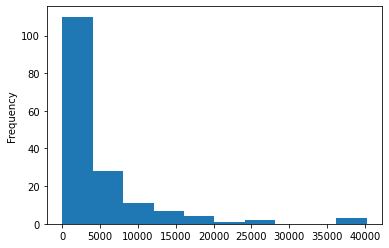

In [24]:
ranking_recovered = df.max_covid_status_recovered.sort_values()
ranking_recovered.plot(kind='hist')

In [34]:
ranking_recovered.head(25)

country
Cameroon                      0.226023
Burundi                       0.277521
Greenland                     3.508772
Yemen                        13.967679
Niger                        17.164457
Chad                         26.092780
Somalia                      28.301768
Mauritius                    36.399371
Thailand                     37.372493
Central African Republic     37.784679
Liberia                      46.381969
Mali                         49.686435
Sierra Leone                 51.259872
New Zealand                  55.910411
Lesotho                      59.897292
Benin                        62.525777
Burkina Faso                 63.258862
Sudan                        68.402928
Nigeria                      79.932085
Anguilla                     86.666667
Finland                      90.236419
Angola                       96.701759
Haiti                        99.245813
Guinea-Bissau               118.241870
Papua New Guinea            121.996200
Name: max_covid_s

Greenland is a good result.

In [35]:
ranking_recovered.iloc[25:50]

country
Spain          126.422842
Dominica       136.111111
Tajikistan     139.138184
Uganda         144.465578
Eritrea        145.149464
Madagascar     147.668918
Afghanistan    149.673757
Costa Rica     151.747154
Togo           162.350525
Belgium        166.056946
Malawi         177.731312
Serbia         178.138949
Guinea         180.606107
Congo          203.171439
Gambia         209.350434
Egypt          222.301483
Algeria        222.802217
Ethiopia       226.798824
Cambodia       252.150248
Zimbabwe       255.325304
Mozambique     275.408735
Senegal        284.155518
Ghana          293.821002
Bhutan         294.689119
Myanmar        302.646572
Name: max_covid_status_recovered, dtype: float64

Spain, Belgium and Serbia also.

In [36]:
ranking_recovered.iloc[50:75]

country
Rwanda                          346.000618
Equatorial Guinea               347.754811
Kenya                           351.371557
Gabon                           357.367475
Cayman Islands                  357.575758
Uzbekistan                      365.615943
Fiji                            376.897321
El Salvador                     392.198582
Pakistan                        414.384858
Comoros                         427.126437
Mauritania                      445.935484
France                          524.518185
Switzerland                     583.477759
Indonesia                       664.403489
Bangladesh                      673.237435
Timor-Leste                     722.989378
Sao Tome and Principe           962.557078
Saint Kitts and Nevis           969.811321
Honduras                        993.538617
Antigua and Barbuda            1022.448980
Zambia                         1023.204961
Singapore                      1066.615385
Djibouti                       1150.708502
Fal

France, Switzerland, Singapore and Australia are also interesting results.